# **Regresión lineal-Motorcycle dataset**

Autor: Roberto Abdón Hernández García

En este notebook se crea un modelo de regresión lineal empleando los datos del dataset "Motorcycle dataset", el cual es importado directamente desde Kaggle.

## **Interpretación de resultados del modelo de regresión lineal**
* R$^2$: La definición de R-cuadrado es bastante sencilla, es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. Es decir: R-cuadrado = Variación explicada / variación total. 0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media. Mientras que 100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.
* Error cuadrático medio (MSE): Representa la distancia al cuadrado entre los valores reales y predichos. realizamos al cuadrado para evitar la cancelación de términos negativos y es útil elevar al cuadrado el error porque da un mayor peso a los valores atípicos. Entre sus consideraciones están: MSE nunca será negativo ya que los errores se elevan al cuadrado, el valor del error varía de cero a infinito, MSE aumenta exponencialmente con un aumento en el error, un buen modelo tendrá un valor MSE más cercano a cero.  
* Raíz del Error Cuadrático Medio (RMSE): Se calcula tomando la raíz cuadrada de MSE. Es conocida también como la desviación cuadrática media. Mide la magnitud promedio de los errores y se ocupa de las desviaciones del valor real. Un RMSE con valor de 0 indica que el modelo tiene un ajuste perfecto y cuanto menor sea el RMSE, mejor será el modelo y sus predicciones.

## **Pasos para el desarollo del modelo**

## **1-Enlazar la cuenta de Google Drive a Google Colab**

El primer paso es enlazar Google Drive a la cuenta de Google Colab donde se va a trabajar. Esto se realiza para el almacenamiento permanente de los datasets con los que se va a trabajar.

In [ ]:
#Enlazar Google Drive a Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **2-Importar ubicación del token API de Kaggle**

Se importa un token API en Kaggle, que es necesario para la descarga de datasets directamente dese allí, siendo ésta una forma más cómoda de acceso a los datasets.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
%cd /content/gdrive/My Drive/Colab Notebooks/Colab

/content/gdrive/My Drive/Colab Notebooks/Colab


## **3-Descargar dataset desde Kaggle**

**Dataset elegido de Kaggle: Motorcycle dataset**

Columnas del dataset:
* name: nombre de la motocicleta.
* selling_price: precio al que el vendedor vende la motocicleta.
* year: año de la motocicleta.
* seller_type: indica si un vendedor es un particular o un distribuidor.
* owner: número de dueños que ha tenido la motocicleta.
* km_driven: número de kilómetros recorridos por la motocicleta.
* ex_showroom_price: precio de agencia de la motocicleta.


Se descarga directamente el dataset que se encontró en Kaggle con este código. -d indica que sólo se busca descargar el archivo .csv que contiene el dataset.

In [ ]:
!kaggle datasets download -d nehalbirla/motorcycle-dataset

Dataset URL: https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset
License(s): DbCL-1.0
motorcycle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## **4-Descomprimir dataset**

Como el o los archivos que se descargan se comprimen en formato .zip, es necesario descomprimir el paquete para tener el acceso a los archivos con los cuales se van a trabajar.

In [ ]:
!unzip motorcycle-dataset.zip

Archive:  motorcycle-dataset.zip
replace BIKE DETAILS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## **5-Ver archivos para saber el nombre del dataset a utilizar**

Para encontrar el nombre del archivo que contiene el dataset, se ejecuta el comando !ls para ver el nombre de todos los archivos. En este caso, como sólo se descargó el dataset, se verifica el nombre del archivo .csv que lo contiene.

In [ ]:
!ls

'BIKE DETAILS.csv'				   'Regresión lineal.ipynb'
 fertility-rate-vs-participation-in-workforce.zip   SLR2.csv
 motorcycle-dataset.zip


## **6-Leer dataset**

Se importa la librería de Python Pandas para leer el dataset y saber si se puede leer correctamente y saber qué datos contiene. Para ello se crea un nuevo dataframe llamado data, que contendrá todos los datos del dataset, sin alterarlo.

In [ ]:
import pandas as pd

data=pd.read_csv('BIKE DETAILS.csv')
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


A partir de aquí se deben visualizar los datos. En este caso para crear modelos de regresión lineal se deben verificar que las variables sean numéricas y categóricas, y, a su vez que no existan valores nulos, duplicados y atípicos que afecten en el aprendizaje del modelo. También se deben eliminar columnas que no aporten al modelo.    

## **7-Manejo de valores nulos**

### Visualizar valores nulos

Al tener un dataset de más de 1000 filas, verificar fila por fila visualmente requiere de mucho tiempo para encontrar datos nulos. Así que se optó por contar las filas con valores nulos dentro de cada columna. Con ello se encontraron 435 valores nulos en la columa ex_showroom_price.

In [ ]:
print(data.isnull().sum())
data[data.isnull().any(axis=1)]

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
...,...,...,...,...,...,...,...
951,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
952,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
957,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
958,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


### Eliminación de valores nulos

Al tener aún gran cantidad de datos para trabajar, se optó por simplemente eliminar todas las filas con valores nulos, creando un nuevo dataframe para guardar los datos que se vayan limpiando llamado data_cleaned. Se verifica que el nuevo dataframe contenga menos filas, eliminándose aquellas con valores nulos.

In [ ]:
data_cleaned=data.dropna(subset=['ex_showroom_price'])
data_cleaned

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


## **8-Manejo de valores duplicados**

### Conteo de filas duplicadas

Se contaron las filas duplicadas para saber si habían o no, además de mostrarlas en un dataframe separado llamado dr, para evitar alterar el dataframe data_cleaned.

In [ ]:
duplicated_rows = (data_cleaned.duplicated(keep=False))
num_duplicated_rows=duplicated_rows.sum()
print(f"Número total de filas duplicadas: {num_duplicated_rows}")

Número total de filas duplicadas: 8


In [ ]:
dr=data_cleaned[duplicated_rows]
dr.sort_values(by=["name"], inplace=True)
display(dr)

/tmp/ipython-input-2908423592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.sort_values(by=["name"], inplace=True)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
329,Bajaj Pulsar 135 LS,20000,2010,Individual,1st owner,80000,64589.0
508,Bajaj Pulsar 135 LS,20000,2010,Individual,1st owner,80000,64589.0
406,Hero Karizma [2003-2014],50000,2013,Individual,1st owner,38000,85766.0
605,Hero Karizma [2003-2014],50000,2013,Individual,1st owner,38000,85766.0
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
773,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
523,Honda CB Hornet 160R,70000,2017,Individual,1st owner,35000,87719.0
607,Honda CB Hornet 160R,70000,2017,Individual,1st owner,35000,87719.0


### Eliminación de filas duplicadas

Lo siguiente es eliminar esas filas duplicadas en data_cleaned. Para comprobar que se hayan eliminado, se vuelve a mostrar data_cleaned, donde deberán aparecer menos filas.

In [ ]:
data_cleaned=data_cleaned.drop_duplicates()
data_cleaned

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


## **9-Manejo de valores atípicos**

### Encontrar valores atípicos en variables numéricas

Una de las formas más convenientes y rápidas para la visualización de los valores atípicos es el empleo de los boxplots, que muestran con un círculo aquellos valores atípicos primero será crear boxplots para el manejo de variables numéricas. Para esto,

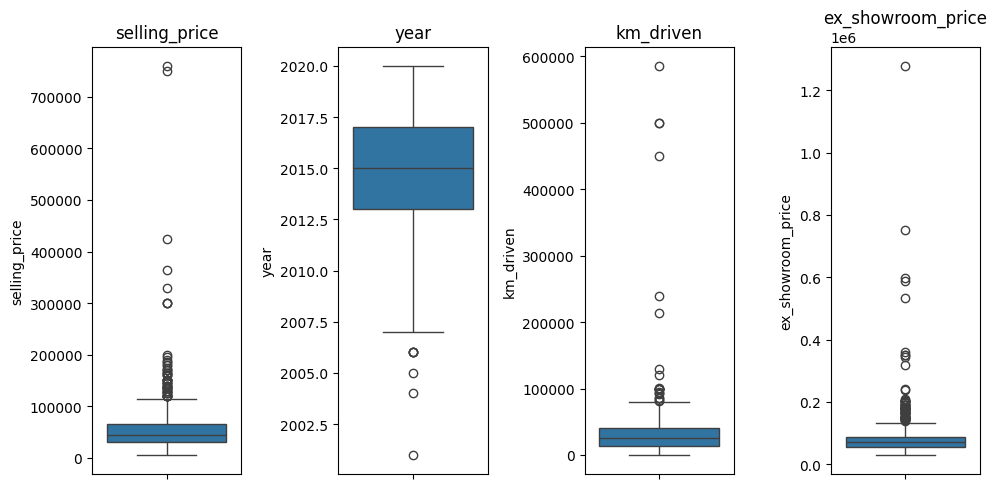

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar columnas numéricas
num_cols = data_cleaned.select_dtypes(include=np.number).columns

# Generar boxplots para cada columna
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)   # una fila, tantas columnas como num_cols
    sns.boxplot(y=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Como se puede ver en los boxplots, hay varias columnas numéricas con valores tanto muy por encima de la media, como muy por debajo de la media. Estos valores alterarían la precisión del modelo de regresión lineal al ser atípicos, más aún si no tienen sentido. Además de que boxplot da la ventaja de identificar en qué rango aproximiado inician los valores atípicos, lo cual será útil para eliminarlos.

Para empezar con la eliminación de los valores atípicos se debe interpretar bien la gráfica boxplot, leer bien los datos y aplicar un poco la lógica para determinar si son datos coherentes o no.

Así que como primer paso, y tras ver que son pocos valores atípicos, se despliegan las 10 columnas con mayor y menor precio de venta de las motocicletas.

In [ ]:
display(data_cleaned.nlargest(10, "selling_price"))
display(data_cleaned.nsmallest(10, "selling_price"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
295,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0
289,Kawasaki Ninja 650 [2018-2019],425000,2017,Individual,2nd owner,13600,599000.0
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0
311,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0
344,BMW G310GS,300000,2018,Individual,1st owner,2500,349000.0
860,Kawasaki Ninja 650 [2018-2019],300000,2011,Individual,1st owner,12000,589000.0
897,Kawasaki Ninja 300,300000,2016,Individual,1st owner,9800,360000.0
588,Honda CBR-250R,200000,2019,Individual,1st owner,5500,202310.0
449,Royal Enfield Classic Signals,195000,2018,Individual,1st owner,2845,164095.0


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
748,Honda Activa [2000-2015],6000,2006,Individual,2nd owner,35000,50267.0
456,Honda Activa [2000-2015],10000,2009,Individual,1st owner,60000,50267.0
464,Bajaj Discover 125,10000,2006,Individual,1st owner,51000,57549.0
924,TVS Victor,10000,2005,Individual,1st owner,55000,54852.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
237,Honda Aviator,14000,2008,Individual,1st owner,66000,59183.0
450,Bajaj Pulsar 180,14900,2007,Individual,1st owner,50000,85011.0
133,Bajaj Pulsar 180,15000,2008,Individual,1st owner,55000,85011.0
170,Bajaj Discover 125,15000,2011,Individual,1st owner,32000,57549.0


Como se puede notar anteriormente, hay unos pocos valores por encima de 200000 dentro de la columna que se está analizando (selling_price). Estos outliers pueden ser eliminados, ya que, aunque a simple vista tengan lógica con respecto al año y kilometraje, representan un sector muy pequeño de las motocicletas y alteraría de gran manera el modelo, reduciendo el R2 de éste.

In [ ]:
data_cleaned = data_cleaned[data_cleaned["selling_price"] < 300000]
display(data_cleaned.nlargest(10, "selling_price"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
588,Honda CBR-250R,200000,2019,Individual,1st owner,5500,202310.0
449,Royal Enfield Classic Signals,195000,2018,Individual,1st owner,2845,164095.0
136,Royal Enfield Classic Gunmetal Grey,190000,2020,Individual,1st owner,500,155740.0
865,Royal Enfield Thunderbird 500X,185000,2018,Individual,1st owner,1500,198605.0
890,Royal Enfield Classic Chrome,185000,2015,Individual,2nd owner,5000,189313.0
411,KTM 390 Duke ABS [2013-2016],180000,2015,Individual,2nd owner,13125,202127.0
882,Royal Enfield Classic Gunmetal Grey,180000,2018,Individual,1st owner,5814,148114.0
960,Royal Enfield Thunder 500,175000,2018,Individual,1st owner,3000,190000.0
213,Bajaj Dominar 400 [2018],170000,2018,Individual,1st owner,16000,163331.0
818,Yamaha YZF R15 V3,170000,2019,Individual,1st owner,1400,146400.0


El mismo proceso aplica para el resto de las columnas numéricas.

Columna: year (Año)

Se encontraron unos outliers en las motocicletas más antiguas, ya que hay motos que son años más viejas que el resto. Se eliminaron esos registros.

In [ ]:
display(data_cleaned.nsmallest(10, "year"))
display(data_cleaned.nlargest(10, "year"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
377,TVS Victor,20000,2001,Individual,1st owner,50000,54852.0
894,TVS Victor,18000,2004,Individual,1st owner,46700,54852.0
924,TVS Victor,10000,2005,Individual,1st owner,55000,54852.0
464,Bajaj Discover 125,10000,2006,Individual,1st owner,51000,57549.0
619,Honda Activa [2000-2015],15000,2006,Individual,1st owner,50000,50267.0
748,Honda Activa [2000-2015],6000,2006,Individual,2nd owner,35000,50267.0
919,TVS Star City,15000,2006,Individual,1st owner,40000,46575.0
187,Bajaj Pulsar 180,25000,2007,Individual,1st owner,80000,85011.0
189,Honda CB Unicorn 150,50000,2007,Individual,1st owner,46000,74295.0
450,Bajaj Pulsar 180,14900,2007,Individual,1st owner,50000,85011.0


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
136,Royal Enfield Classic Gunmetal Grey,190000,2020,Individual,1st owner,500,155740.0
34,Honda CB Shine SP,62000,2019,Individual,1st owner,10000,71049.0
54,Honda Activa 5G,70000,2019,Individual,1st owner,3000,59422.0
74,Royal Enfield Thunderbird 350X,165000,2019,Individual,1st owner,3700,164004.0
82,Honda Activa 5G,62000,2019,Individual,1st owner,3500,57557.0
96,Yamaha FZ25,150000,2019,Individual,1st owner,2500,133680.0
128,Honda Activa 5G,55000,2019,Individual,1st owner,10000,57557.0
229,Yamaha Cygnus Ray ZR,56000,2019,Individual,1st owner,3900,58630.0
233,Honda CB Hornet 160R,95000,2019,Individual,1st owner,8000,94703.0
252,Royal Enfield Thunderbird 350X,145000,2019,Individual,1st owner,2700,164004.0


In [ ]:
data_cleaned = data_cleaned[data_cleaned["year"] >2005]
display(data_cleaned.nsmallest(10, "year"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
464,Bajaj Discover 125,10000,2006,Individual,1st owner,51000,57549.0
619,Honda Activa [2000-2015],15000,2006,Individual,1st owner,50000,50267.0
748,Honda Activa [2000-2015],6000,2006,Individual,2nd owner,35000,50267.0
919,TVS Star City,15000,2006,Individual,1st owner,40000,46575.0
187,Bajaj Pulsar 180,25000,2007,Individual,1st owner,80000,85011.0
189,Honda CB Unicorn 150,50000,2007,Individual,1st owner,46000,74295.0
450,Bajaj Pulsar 180,14900,2007,Individual,1st owner,50000,85011.0
751,Bajaj Discover 110,15000,2007,Individual,1st owner,70000,52710.0
832,Honda Activa [2000-2015],25000,2007,Individual,1st owner,17860,50267.0
1049,Hero Super Splendor,20000,2007,Individual,1st owner,55000,57000.0


Columna km_driven (kilómetros recorridos)



Se encontraron 6 registros que superan los 200000 kilómetros, decenas o cientos de miles de kilómetros más de distancia recorrida que el resto. Se eliminaron para ajustar de mejor manera el modelo.

In [ ]:
display(data_cleaned.nsmallest(10, "km_driven"))
display(data_cleaned.nlargest(10, "km_driven"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
657,TVS Scooty Zest 110,55000,2018,Individual,1st owner,380,53751.0
136,Royal Enfield Classic Gunmetal Grey,190000,2020,Individual,1st owner,500,155740.0
993,Bajaj Avenger 220,72000,2018,Individual,1st owner,500,95000.0
1025,Activa 3g,45000,2018,Individual,1st owner,500,54000.0
559,Hero Splendor Plus i3s,65000,2019,Individual,1st owner,1000,55600.0
1026,Hero Passion Pro,45000,2018,Individual,1st owner,1000,55000.0
681,Yamaha YZF R15 [2011-2018],50000,2014,Individual,1st owner,1200,118997.0
963,Bajaj Dominar 400,145000,2019,Individual,1st owner,1200,160000.0
986,Bajaj Avenger 220,90000,2019,Individual,1st owner,1300,95000.0
1033,Activa 4g,40000,2019,Individual,1st owner,1300,51000.0


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
877,Hero Glamour 125,35000,2014,Individual,1st owner,450000,61600.0
714,Honda CB Hornet 160R,70000,2017,Individual,1st owner,240000,92210.0
1039,Honda Karizma,31000,2012,Individual,1st owner,213000,105000.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
598,Yamaha Fazer [2009-2016],25000,2013,Individual,1st owner,120000,84751.0
592,TVS Star City,21000,2011,Individual,1st owner,101000,47108.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0


In [ ]:
data_cleaned = data_cleaned[data_cleaned["km_driven"] < 200000]
display(data_cleaned.nlargest(10, "km_driven"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
598,Yamaha Fazer [2009-2016],25000,2013,Individual,1st owner,120000,84751.0
592,TVS Star City,21000,2011,Individual,1st owner,101000,47108.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
687,Honda Activa [2000-2015],16600,2010,Individual,1st owner,100000,50267.0
695,Yamaha Fazer [2009-2016],50000,2012,Individual,1st owner,100000,84751.0
726,Honda CB Hornet 160R,80000,2016,Individual,1st owner,100000,92661.0
930,Hero Maestro,50000,2016,Individual,1st owner,100000,49412.0
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0


Columna es_showroom_price (precio de agencia)

Se eliminaron dos valores atípicos, de más de 300000, ya que son muy superiores al rango del resto de las motos.

In [ ]:
display(data_cleaned.nsmallest(10, "ex_showroom_price"))
display(data_cleaned.nlargest(10, "ex_showroom_price"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
851,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
906,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
50,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
99,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
125,Bajaj Discover 100,20000,2012,Individual,1st owner,85000,42859.0
500,Bajaj Discover 100,30000,2011,Individual,1st owner,45000,42859.0
652,Bajaj Discover 100,25000,2010,Individual,2nd owner,28000,42859.0
739,Bajaj Discover 100,28000,2015,Individual,2nd owner,52000,42859.0
823,Bajaj Discover 100,22000,2014,Individual,1st owner,14289,42859.0


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
966,Hyosung GT250R,135000,2016,Individual,2nd owner,16500,345000.0
291,Kawasaki Ninja 250R,125000,2010,Individual,2nd owner,21000,317934.0
972,KTM 390 Duke,115000,2016,Individual,1st owner,7000,240000.0
965,KTM RC390,135000,2017,Individual,1st owner,21700,237000.0
866,Royal Enfield Continental GT [2013 - 2018],110000,2014,Individual,1st owner,12077,208902.0
394,Royal Enfield Classic Stealth Black,160000,2018,Individual,1st owner,7500,204977.0
37,Honda CBR-250R,120000,2016,Individual,1st owner,16000,202310.0
588,Honda CBR-250R,200000,2019,Individual,1st owner,5500,202310.0
137,KTM 390 Duke ABS [2013-2016],130000,2015,Individual,1st owner,50000,202127.0
411,KTM 390 Duke ABS [2013-2016],180000,2015,Individual,2nd owner,13125,202127.0


In [ ]:
data_cleaned = data_cleaned[data_cleaned["ex_showroom_price"] < 300000]
display(data_cleaned.nlargest(10, "ex_showroom_price"))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
972,KTM 390 Duke,115000,2016,Individual,1st owner,7000,240000.0
965,KTM RC390,135000,2017,Individual,1st owner,21700,237000.0
866,Royal Enfield Continental GT [2013 - 2018],110000,2014,Individual,1st owner,12077,208902.0
394,Royal Enfield Classic Stealth Black,160000,2018,Individual,1st owner,7500,204977.0
37,Honda CBR-250R,120000,2016,Individual,1st owner,16000,202310.0
588,Honda CBR-250R,200000,2019,Individual,1st owner,5500,202310.0
137,KTM 390 Duke ABS [2013-2016],130000,2015,Individual,1st owner,50000,202127.0
411,KTM 390 Duke ABS [2013-2016],180000,2015,Individual,2nd owner,13125,202127.0
262,Honda CBR-250R,100000,2014,Individual,1st owner,19000,199275.0
865,Royal Enfield Thunderbird 500X,185000,2018,Individual,1st owner,1500,198605.0


Entonces, lo siguiente será volver a ejecutar el gráfico de boxplot, esta vez con los datos ya sin valores atípicos. Esto con el propósito de comprobar diferencias y verificar el proceso.

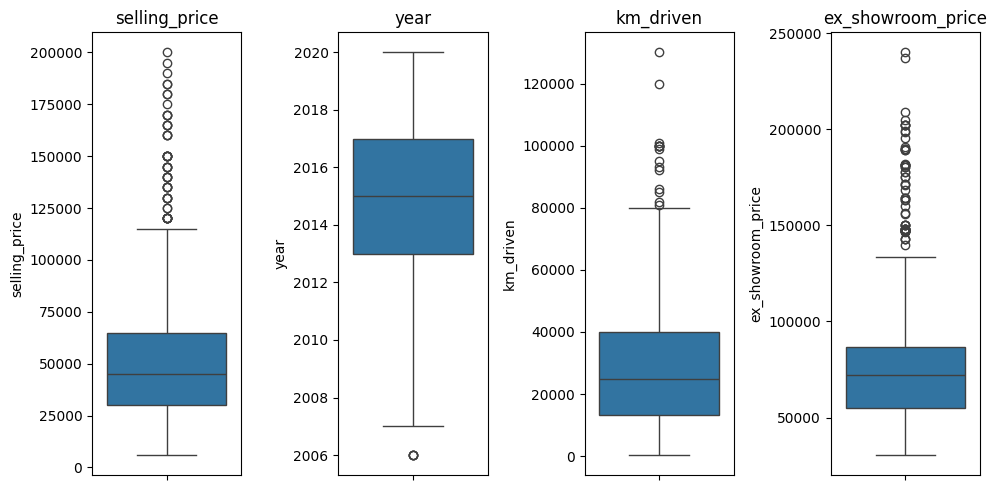

In [ ]:
# Seleccionar columnas numéricas
num_cols = data_cleaned.select_dtypes(include=np.number).columns

# Generar boxplots para cada columna
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)   # una fila, tantas columnas como num_cols
    sns.boxplot(y=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## **10-Matriz de correlación para variables numéricas.**

Tras los ajustes realizados para la eliminación de outliers, se creó una matriz de correlación para visualizar las relaciones que existen entre variables numéricas.

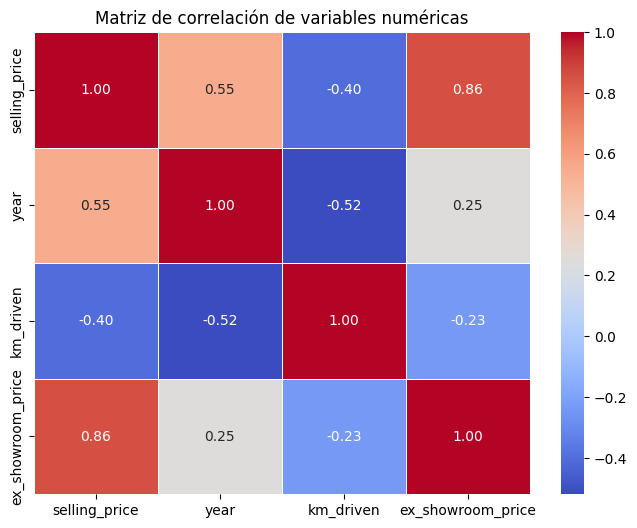

In [ ]:
num_df = data_cleaned.select_dtypes(include=["int64", "float64"])

corr = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,         # valores dentro de cada celda
    cmap="coolwarm",    # paleta de colores
    fmt=".2f",          # 2 decimales
    linewidths=0.5
)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

## **11-Eliminación de la columna name**

La columna name fue útil para encontrar duplicados o determinar si los datos de las motocicletas eran consistentes, pero a partir de este punto es completamente innecesaria, debido a que son tantos modelos y marcas de motos (centenares) que categorizarlos no vale la pena.

In [ ]:
data_cleaned = data_cleaned.drop(columns=["name"])
data_cleaned

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,150000,2018,Individual,1st owner,12000,148114.0
3,65000,2015,Individual,1st owner,23000,89643.0
5,18000,2010,Individual,1st owner,60000,53857.0
6,78500,2018,Individual,1st owner,17000,87719.0
9,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...
1055,18000,2017,Individual,1st owner,35000,32000.0
1057,16000,2012,Individual,1st owner,33000,51000.0
1058,15000,2013,Individual,2nd owner,35000,57000.0
1059,12000,2009,Individual,1st owner,53000,58000.0


## **12-Manejo de valores categóricos**

Lo siguiente es verificar cuántas categorías hay en cada columna categórica. Se visualiza que hay dos categorías en seller_type y tres en owner.

In [ ]:
print("Categorías en seller_type:")
print(data_cleaned["seller_type"].unique())
print("\nCantidad de categorías:", data_cleaned["seller_type"].nunique())

Categorías en seller_type:
['Individual' 'Dealer']

Cantidad de categorías: 2


In [ ]:
print("Categorías en owner:")
print(data_cleaned["owner"].unique())
print("\nCantidad de categorías:", data_cleaned["owner"].nunique())

Categorías en owner:
['1st owner' '2nd owner' '3rd owner']

Cantidad de categorías: 3


Lo siguiente es darle formato a los valores categóricos. En lugar de manejar los valores categóricos como texto, se convirtieron a booleano, donde se crean columnas con las categorías y se indica con True/1 si pertenece a tal categoría o False/0 si no es así. Esto mediante get_dummies.

Esto se realiza para que el modelo de regresión lineal interprete correctamente los datos.

Además, se usó drop_first=True para evitar colinealidades, donde dos variables aportarían información casi idéntica al deducirse una de ota y existiría un sesgo en la inferencia de datos.

In [ ]:
data_cleaned=pd.get_dummies(data_cleaned, columns=["seller_type","owner"], drop_first=True)

In [ ]:
data_cleaned

,selling_price,year,km_driven,ex_showroom_price,seller_type_Individual,owner_2nd owner,owner_3rd owner
2,150000,2018,12000,148114.0,True,False,False
3,65000,2015,23000,89643.0,True,False,False
5,18000,2010,60000,53857.0,True,False,False
6,78500,2018,17000,87719.0,True,False,False
9,50000,2016,42000,60122.0,True,False,False
...,...,...,...,...,...,...,...
1055,18000,2017,35000,32000.0,True,False,False
1057,16000,2012,33000,51000.0,True,False,False
1058,15000,2013,35000,57000.0,True,True,False
1059,12000,2009,53000,58000.0,True,False,False


## **13-Matriz de correlación incluyendo variables categóricas**

Se realiza una matriz de correlación, ya incluyendo variables categóricas para determinar de cuáles variables se puede realizar un modelo de regresión lineal y encontrar de cuál tendría el mejor R2.

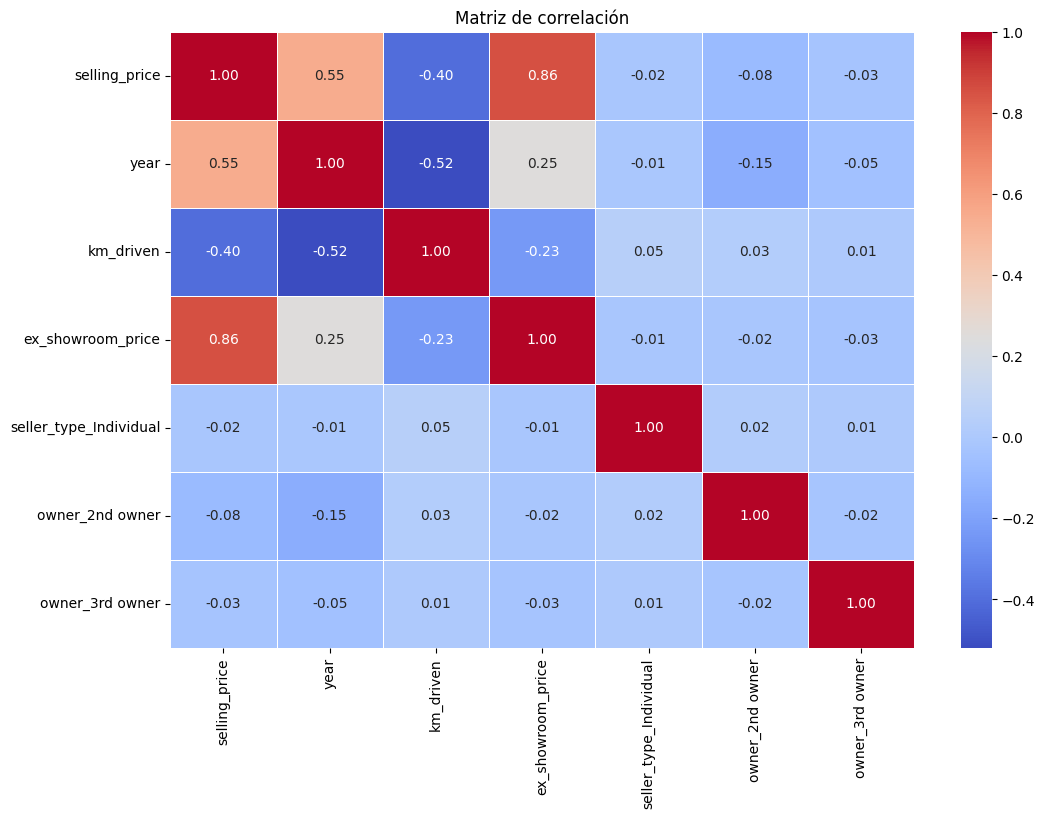

In [ ]:
corr = data_cleaned.corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Matriz de correlación")
plt.show()


## **14-Modelos de regresión lineal**

Para la creación del modelo lineal se utilizarán las siguientes librerías de Python:
* matplotlib=Librería para visualizaciones de datos.
* numpy=Procesamiento numérico.
* scikit-learn=Importar métricas, agrupaciones...

Se dividen los datos en X e Y, según las columnas, y a su vez se dividen los datos en datos de entrenamiento y de prueba. Se crea el modelo de regresión lineal para realizar las predicciones de valores según los datos de entrenamiento. A partir del modelo se obtienen métricas como la pendiente de la recta, error cuadrático medio y coeficiente de determinación. Finalmente se muestra una gráfica con los valores y tendencias del modelo.

La variables X son las variables independientes, las cuales en función de éstas, tratarán de predecir la variable dependiente o Y. La variable a predecir será el precio de venta o selling_price.

### Modelo 1: Modelo de regresión lineal que incluye todas las variables.

Se usan todas las variables restantes para predecir selling_price, para visualizar el R2 en pruebas y emplearlo como referencia para el resto de modelos.

MSE (Error cuadrático medio): 207018198.15
Raíz cuadrada del MSE: 14388.13
R²: 0.8704


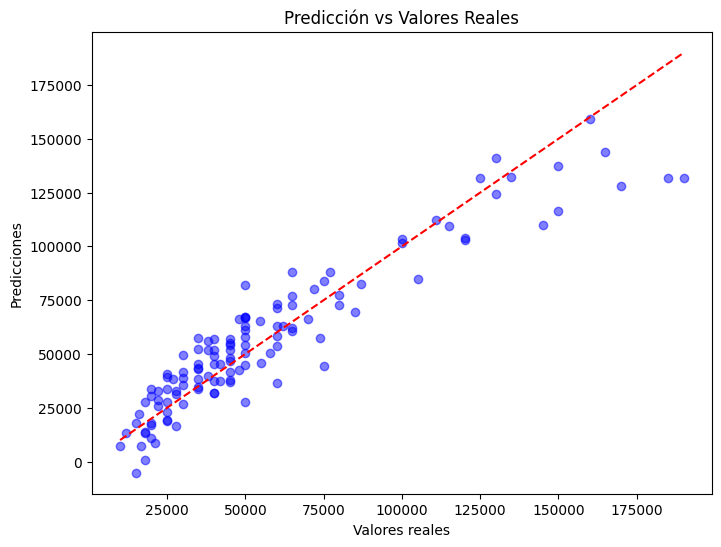

In [ ]:
#Importación de librerías
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data_cleaned.drop(columns=["selling_price"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

### Modelo 2: Eliminación de ex_showroom_price

Se elimina la columna, que es la que tiene más relación con selling_price, para verificar el comportamiento del modelo y cuánto se afecta al R2.

MSE (Error cuadrático medio): 1124948497.22
Raíz cuadrada del MSE: 33540.25
R²: 0.2957


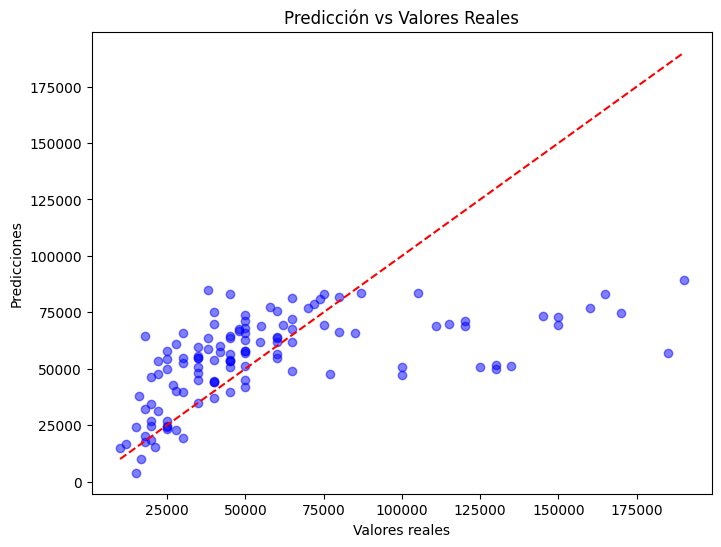

In [ ]:
X = data_cleaned.drop(columns=["selling_price", "ex_showroom_price"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

Se visualiza que en el modelo el R2 es muy bajo, lo cual significa que no se predicen bien los datos.

### Modelo 3: Eliminación de km_driven

En el siguiente modelo se elimina km_driven para verificar el impacto de esta variable en el modelo. Se visualiza que su impacto es menor, reduciendo el R2 en aproximadamente 0.01

MSE (Error cuadrático medio): 209673172.76
Raíz cuadrada del MSE: 14480.1
R²: 0.8687


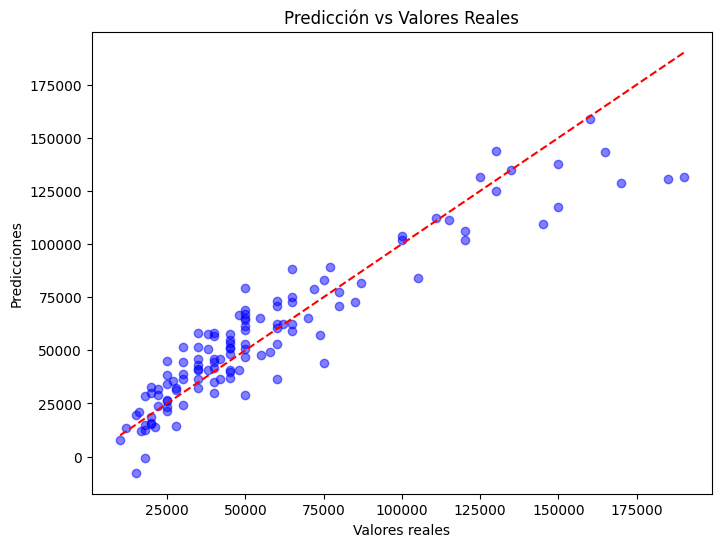

In [ ]:
X = data_cleaned.drop(columns=["selling_price", "km_driven"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

### Modelo 4: Eliminación de year

En el siguiente modelo se busca verificar el comportamiento de éste, eliminando solamente la variable year. En este caso, si se prescinde de esta variable, el R2 baja a 0.80, lo cual significa que year es importante en la predicción del precio del vehículo.

MSE (Error cuadrático medio): 315178928.71
Raíz cuadrada del MSE: 17753.28
R²: 0.8027


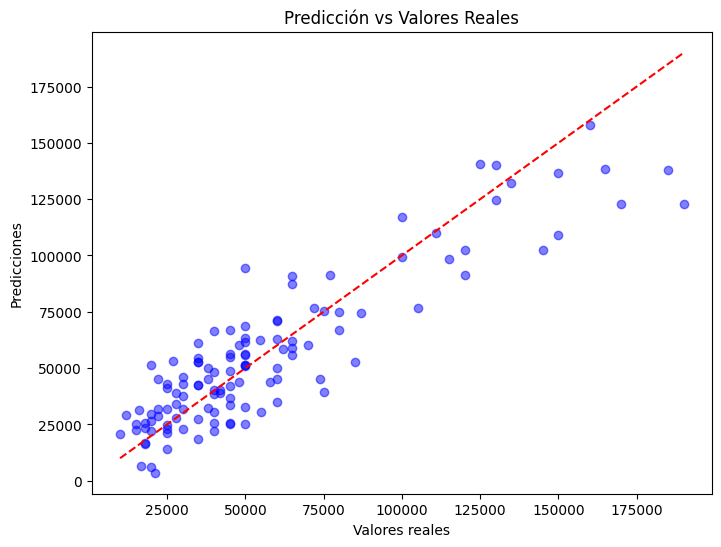

In [ ]:
X = data_cleaned.drop(columns=["selling_price", "year"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

### Modelo 5: Eliminación de km_driven y year

La eliminación de km_driven y year en conjunto sí baja aún más el R2 del modelo, que eliminar cada variable por separado.

MSE (Error cuadrático medio): 357537689.52
Raíz cuadrada del MSE: 18908.67
R²: 0.7761


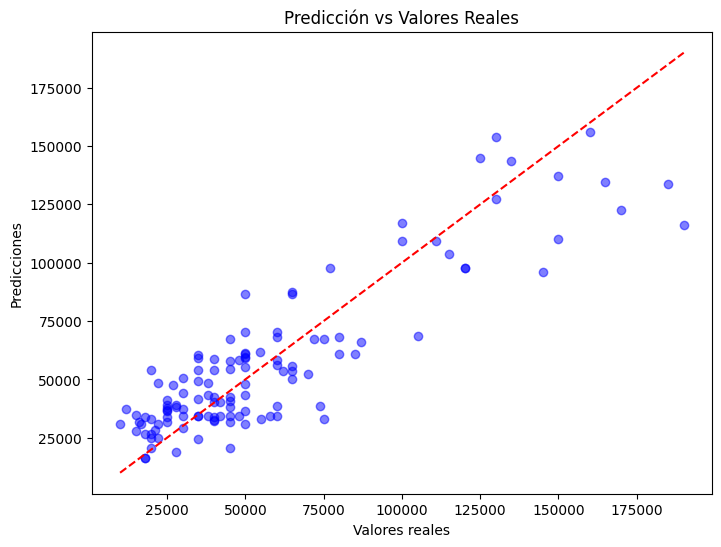

In [ ]:
X = data_cleaned.drop(columns=["selling_price", "km_driven", "year"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

### Modelo 6: Eliminación de variables de owner

Eliminar las variables de owner tiene muy poco impacto en el R2. Incluso se incrementa ligeramente el R2.  

MSE (Error cuadrático medio): 201775127.85
Raíz cuadrada del MSE: 14204.76
R²: 0.8737


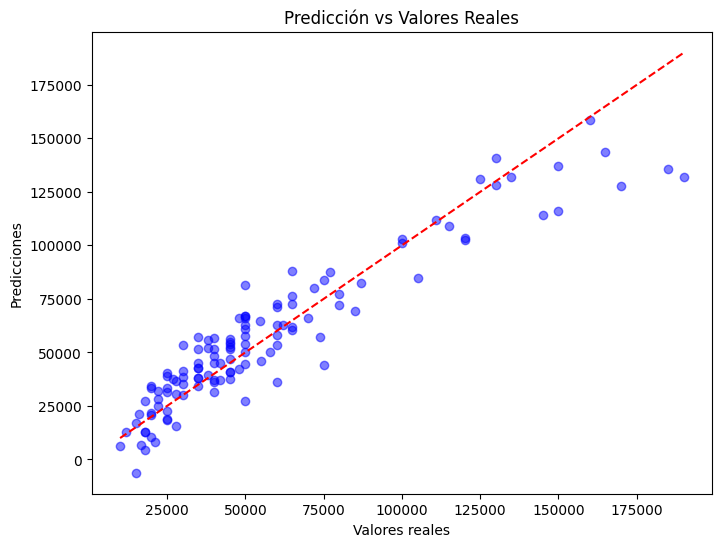

In [ ]:
X = data_cleaned.drop(columns=["selling_price", "owner_2nd owner", "owner_3rd owner"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

### Modelo 7: Eliminación de variables de seller (individual)

Lo mismo que el modelo anterior se aplica al eliminar la variable de seller, donde se aumenta el R2, aunque en menor medida.

MSE (Error cuadrático medio): 206167932.23
Raíz cuadrada del MSE: 14358.55
R²: 0.8709


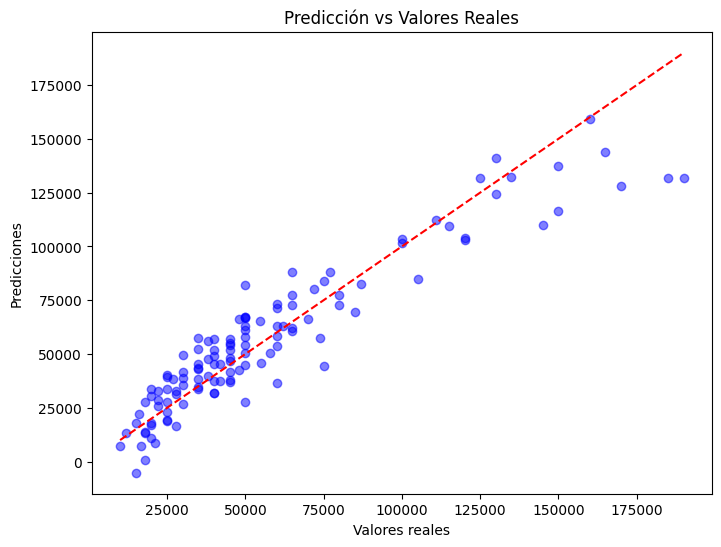

In [ ]:
X = data_cleaned.drop(columns=["selling_price", "seller_type_Individual"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

### Modelo 8: Eliminación de variables de vendedor (individual) y owner

Para encontrar el modelo con R2 más alto, se eliminaron las variables que al ser quitadas en modelos anteriores se incrementa el R2. Como resultado, el R2 fue más alto que en todos los modelos previos, con 0.8743

MSE (Error cuadrático medio): 200816410.51
Raíz cuadrada del MSE: 14170.97
R²: 0.8743


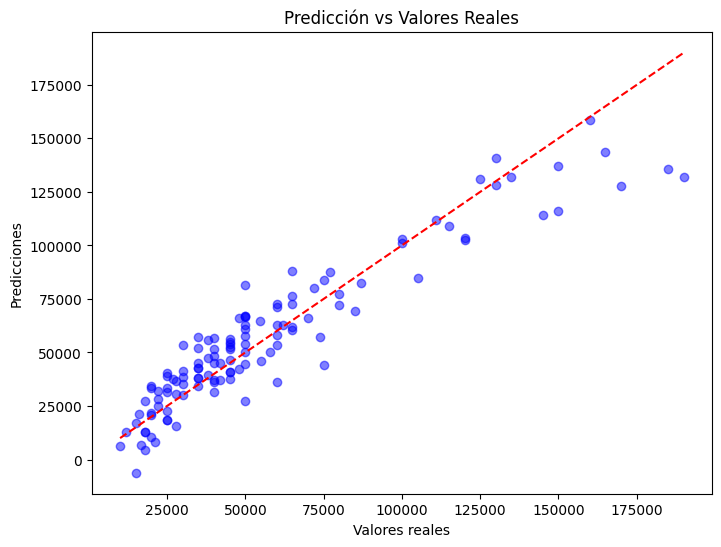

In [ ]:
X = data_cleaned.drop(columns=["selling_price", "seller_type_Individual", "owner_2nd owner", "owner_3rd owner"])
y = data_cleaned["selling_price"]

#División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE (Error cuadrático medio):", round(mse, 2))
print("Raíz cuadrada del MSE:", round(rmse, 2))
print("R²:", round(r2, 4))

#Visualización
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Valores Reales")
plt.show()

## **Conclusiones**

* La matriz de correlación fue fundamental para determinar qué variables afectarían más en la predicción del valor que se quiere encontrar.
* El R$^2$, tras la eliminación de las variables con menor correlación con la variable a predecir, mejoró muy ligeramente.
* Por lo tanto, hay variables que al no tener correlación con la variable a predecir, pueden eliminarse sin alterar de gran manera al modelo (incluso mejorándolo).  
